In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, r2_score

# Load the Wine dataset
wine = load_wine()
X, y = wine.data, wine.target

# Split data into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Train Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        47
           1       1.00      0.93      0.96        57
           2       0.95      1.00      0.97        38

    accuracy                           0.97       142
   macro avg       0.97      0.98      0.97       142
weighted avg       0.97      0.97      0.97       142

Test Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.93      0.96        14
           2       1.00      1.00      1.00        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36

Model has a Regular Fit.

Train Confusion Matrix:
 [[47  0  0]
 [ 2 53  2]
 [ 0  0 38]]

Test Confusion Matrix:
 [[12  0  0]
 [ 1 13  0]
 [ 0  0 10]]


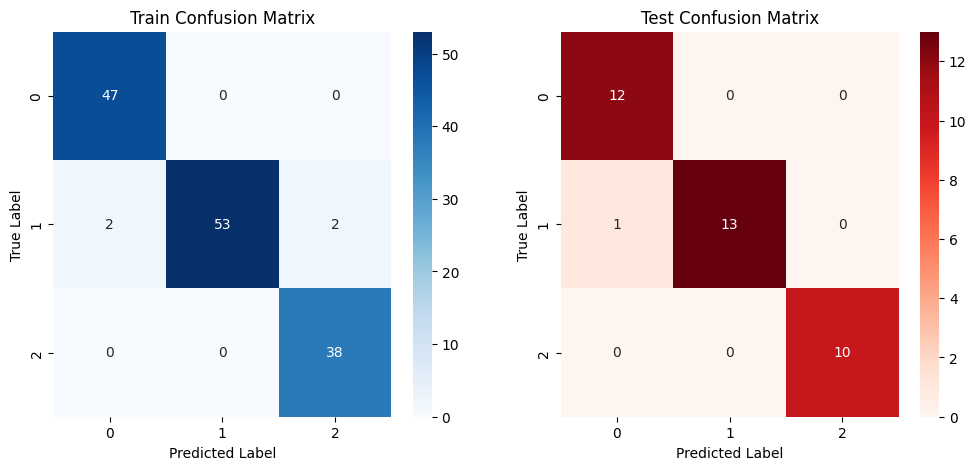

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Train kNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predictions
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Compute confusion matrices
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Display classification report
print("Train Classification Report:\n", classification_report(y_train, y_train_pred))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))

# Model Fit Analysis
train_accuracy = knn.score(X_train, y_train)
test_accuracy = knn.score(X_test, y_test)
if train_accuracy > 0.95 and test_accuracy < 0.80:
    print("Model is Overfitting.")
elif test_accuracy < 0.70:
    print("Model is Underfitting.")
else:
    print("Model has a Regular Fit.")

# Print Confusion Matrices
print("\nTrain Confusion Matrix:\n", cm_train)
print("\nTest Confusion Matrix:\n", cm_test)

# Visualizing Confusion Matrix
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Train Confusion Matrix
sns.heatmap(cm_train, annot=True, fmt='d', cmap="Blues", ax=ax[0])
ax[0].set_title("Train Confusion Matrix")
ax[0].set_xlabel("Predicted Label")
ax[0].set_ylabel("True Label")

# Test Confusion Matrix
sns.heatmap(cm_test, annot=True, fmt='d', cmap="Reds", ax=ax[1])
ax[1].set_title("Test Confusion Matrix")
ax[1].set_xlabel("Predicted Label")
ax[1].set_ylabel("True Label")

plt.show()


In [ ]:
# Compute MSE, RMSE, R² for classification for wine dataser
mse_train_knn = mean_squared_error(y_train, y_train_pred)
mse_test_knn = mean_squared_error(y_test, y_test_pred)

rmse_train_knn = np.sqrt(mse_train_knn)
rmse_test_knn = np.sqrt(mse_test_knn)

r2_train_knn = r2_score(y_train, y_train_pred)
r2_test_knn = r2_score(y_test, y_test_pred)

# Print results
print(f"WINE DATASET (Classification):")
print(f"Train MSE: {mse_train_knn}, RMSE: {rmse_train_knn}, R²: {r2_train_knn}")
print(f"Test MSE: {mse_test_knn}, RMSE: {rmse_test_knn}, R²: {r2_test_knn}")
df = pd.read_excel("Lab Session Data.xlsx", sheet_name="IRCTC Stock Price")

# Select required columns
y_true = df["Price"].values
y_pred = df["Price"].rolling(window=2).mean().fillna(df["Price"].mean()).values  # Simple Moving Average as a prediction

# Compute Error Metrics
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
r2 = r2_score(y_true, y_pred)

# Print Results
print("lab 2 dataset")
print(f"MSE: {mse}, RMSE: {rmse}, MAPE: {mape}, R²: {r2}")


WINE DATASET (Classification):
Train MSE: 0.028169014084507043, RMSE: 0.16783627165933782, R²: 0.9526232379681374
Test MSE: 0.027777777777777776, RMSE: 0.16666666666666666, R²: 0.9543147208121827
lab 2 dataset
MSE: 1432.3055609396658, RMSE: 37.84581299086685, MAPE: 0.7800263046016155, R²: 0.97551467614225


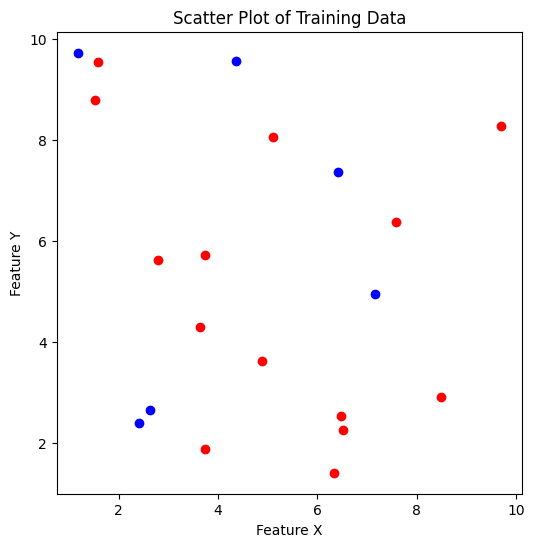

In [ ]:
# Generate 20 random data points
np.random.seed(42)
X_train_2D = np.random.uniform(1, 10, (20, 2))
y_train_2D = np.random.choice([0, 1], size=20)  # Class 0 (Blue) & Class 1 (Red)

# Scatter plot
plt.figure(figsize=(6, 6))
for i in range(20):
    color = 'blue' if y_train_2D[i] == 0 else 'red'
    plt.scatter(X_train_2D[i, 0], X_train_2D[i, 1], color=color)
plt.xlabel("Feature X")
plt.ylabel("Feature Y")
plt.title("Scatter Plot of Training Data")
plt.show()


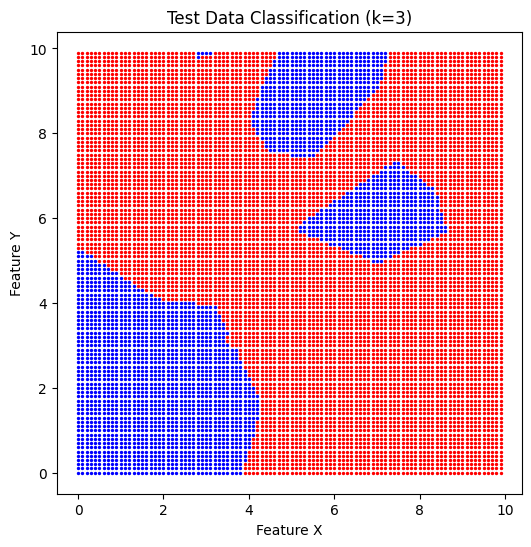

In [ ]:
# Generate test data (10,000 points)
X_test_2D = np.array([[x, y] for x in np.arange(0, 10, 0.1) for y in np.arange(0, 10, 0.1)])

# Train kNN classifier
knn_2D = KNeighborsClassifier(n_neighbors=3)
knn_2D.fit(X_train_2D, y_train_2D)

# Predict test labels
y_test_pred_2D = knn_2D.predict(X_test_2D)

# Plot test data classification
plt.figure(figsize=(6, 6))
for i in range(len(y_test_pred_2D)):
    color = 'blue' if y_test_pred_2D[i] == 0 else 'red'
    plt.scatter(X_test_2D[i, 0], X_test_2D[i, 1], color=color, s=2)
plt.xlabel("Feature X")
plt.ylabel("Feature Y")
plt.title("Test Data Classification (k=3)")
plt.show()


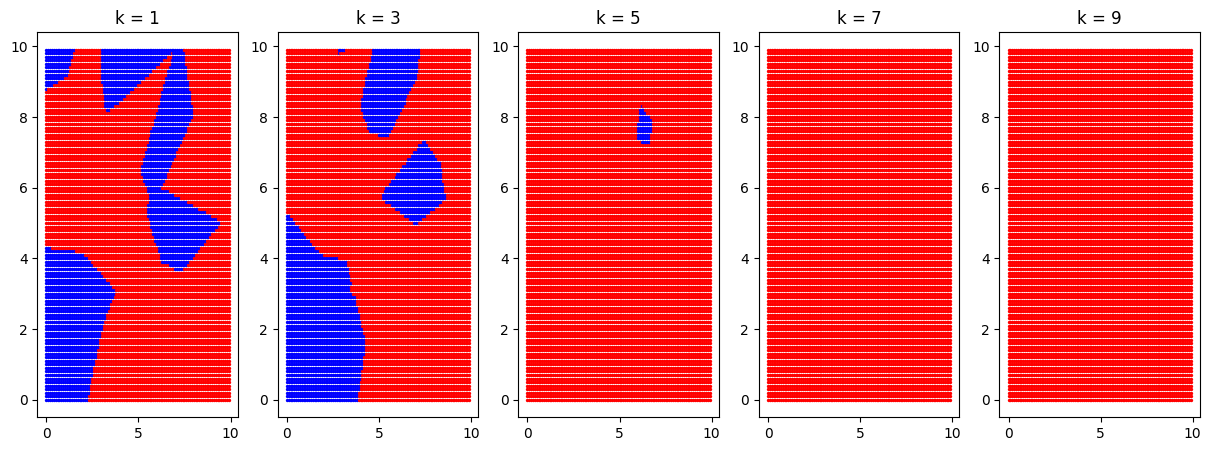

In [ ]:
k_values = [1, 3, 5, 7, 9]
fig, axes = plt.subplots(1, len(k_values), figsize=(15, 5))

for idx, k in enumerate(k_values):
    knn_k = KNeighborsClassifier(n_neighbors=k)
    knn_k.fit(X_train_2D, y_train_2D)
    y_test_pred_k = knn_k.predict(X_test_2D)

    axes[idx].set_title(f"k = {k}")
    for i in range(len(y_test_pred_k)):
        color = 'blue' if y_test_pred_k[i] == 0 else 'red'
        axes[idx].scatter(X_test_2D[i, 0], X_test_2D[i, 1], color=color, s=2)

plt.show()


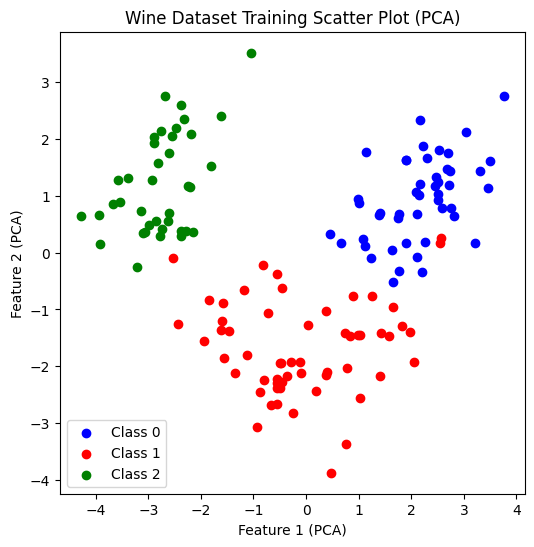

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

# Load Wine Dataset
wine = load_wine()
X, y = wine.data, wine.target

# Reduce Dimensions to 2D using PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Normalize features before PCA
pca = PCA(n_components=2)
X_wine_2D = pca.fit_transform(X_scaled)

# Split into Training & Test Sets
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(X_wine_2D, y, test_size=0.2, random_state=42, stratify=y)

# Train kNN Classifier (k=3)
knn_wine = KNeighborsClassifier(n_neighbors=3)
knn_wine.fit(X_train_wine, y_train_wine)
y_test_wine_pred = knn_wine.predict(X_test_wine)

# Scatter Plot for Wine Training Data
plt.figure(figsize=(6, 6))
for label, color in zip(range(3), ['blue', 'red', 'green']):
    plt.scatter(X_train_wine[y_train_wine == label, 0], X_train_wine[y_train_wine == label, 1], color=color, label=f"Class {label}")

plt.xlabel("Feature 1 (PCA)")
plt.ylabel("Feature 2 (PCA)")
plt.title("Wine Dataset Training Scatter Plot (PCA)")
plt.legend()
plt.show()


Best k value found using GridSearchCV: 1


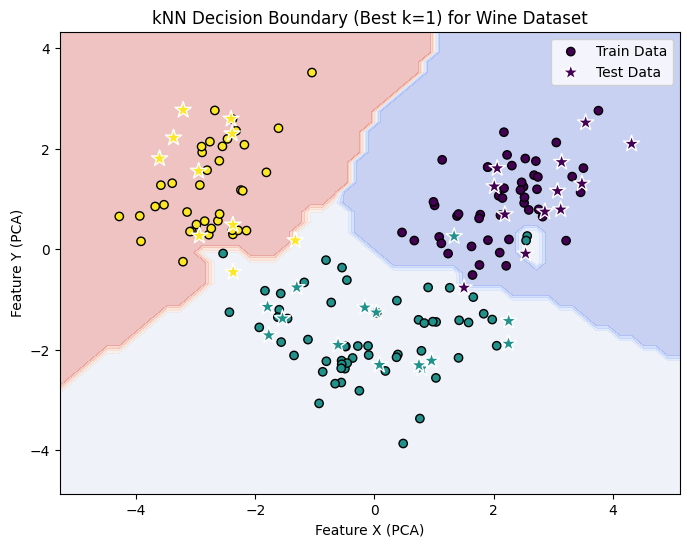

In [3]:
# Define range for k values
max_k = min(len(X_train_wine), 20)  # k should be ≤ number of training samples
param_grid = {'n_neighbors': np.arange(1, max_k)}

# Grid Search for Best k
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_wine, y_train_wine)

# Get best k value
best_k = grid_search.best_params_['n_neighbors']
print(f"Best k value found using GridSearchCV: {best_k}")

# Train kNN with Best k
knn_best_wine = KNeighborsClassifier(n_neighbors=best_k)
knn_best_wine.fit(X_train_wine, y_train_wine)

# Predict on Test Data
y_pred_wine = knn_best_wine.predict(X_test_wine)


h = 0.2
x_min, x_max = X_wine_2D[:, 0].min() - 1, X_wine_2D[:, 0].max() + 1
y_min, y_max = X_wine_2D[:, 1].min() - 1, X_wine_2D[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict class for each point in mesh
Z = knn_best_wine.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot Decision Boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
plt.scatter(X_train_wine[:, 0], X_train_wine[:, 1], c=y_train_wine, edgecolors="k", label="Train Data")
plt.scatter(X_test_wine[:, 0], X_test_wine[:, 1], c=y_test_wine, edgecolors="w", marker="*", s=150, label="Test Data")
plt.xlabel("Feature X (PCA)")
plt.ylabel("Feature Y (PCA)")
plt.title(f"kNN Decision Boundary (Best k={best_k}) for Wine Dataset")
plt.legend()
plt.show()
